In [1]:
try:
  import pandas as pd
  import matplotlib.pyplot as plt

except Exception as e:
  print(f'Installing packages: {e}')
  !pip install pandas matplotlib

In [4]:
#now we start the concating for all days
col_names = ['date','country/region','new_cases','new_deaths','total_cases','total_deaths','total_recovery']
day01 = pd.read_csv('data/jordan01.csv', names=col_names)
day02 = pd.read_csv('data/jordan02.csv', names=col_names)
day03 = pd.read_csv('data/jordan03.csv', names=col_names)
day04 = pd.read_csv('data/jordan04.csv', names=col_names)
day05 = pd.read_csv('data/jordan05.csv', names=col_names)
day06 = pd.read_csv('data/jordan06.csv', names=col_names)
day07 = pd.read_csv('data/jordan07.csv', names=col_names)
day08 = pd.read_csv('data/jordan08.csv', names=col_names)
day09 = pd.read_csv('data/jordan09.csv', names=col_names)
day10 = pd.read_csv('data/jordan10.csv', names=col_names)
day11 = pd.read_csv('data/jordan11.csv', names=col_names)
day12 = pd.read_csv('data/jordan12.csv', names=col_names)
day13 = pd.read_csv('data/jordan13.csv', names=col_names)
day14 = pd.read_csv('data/jordan14.csv', names=col_names)
day15 = pd.read_csv('data/jordan15.csv', names=col_names)
day16 = pd.read_csv('data/jordan16.csv', names=col_names)
day17 = pd.read_csv('data/jordan17.csv', names=col_names)
day18 = pd.read_csv('data/jordan18.csv', names=col_names)
day19 = pd.read_csv('data/jordan19.csv', names=col_names)
day20 = pd.read_csv('data/jordan20.csv', names=col_names)
day21 = pd.read_csv('data/jordan21.csv', names=col_names)
day22 = pd.read_csv('data/jordan22.csv', names=col_names)
day23 = pd.read_csv('data/jordan23.csv', names=col_names)
day24 = pd.read_csv('data/jordan24.csv', names=col_names)
day25 = pd.read_csv('data/jordan25.csv', names=col_names)
day26 = pd.read_csv('data/jordan26.csv', names=col_names)
day27 = pd.read_csv('data/jordan27.csv', names=col_names)

In [6]:
#lets concat using pd.concat() method
data = pd.concat([day01,day02,day03,day04,day05,day06,day07,
	day08,day09,day10,day11,day12,day13,day14,day15,day16,
	day17,day18,day19,day20,day21,day22,day23,day24,day25,
	day26,day27])

data.to_csv('./data/gen.csv', index=False)

In [8]:
#removing punctuation from all rows, then converting them all to int()
genData = pd.read_csv('data/gen.csv')
genData['new_cases'] = genData['new_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['new_deaths'] = genData['new_deaths'].replace(r'\W', '', regex=True).astype('int')
genData['total_cases'] = genData['total_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_deaths'] = genData['total_deaths'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_recovery'] = genData['total_recovery'].str.replace(r'\W', '', regex=True).astype('int')

genData

,date,country/region,new_cases,new_deaths,total_cases,total_deaths,total_recovery
0,2021-3-01,Jordan,6068,26,397158,4727,351256
1,2021-3-02,Jordan,5124,29,402282,4756,354143
2,2021-3-03,Jordan,5335,37,407617,4793,355781
3,2021-3-04,Jordan,5733,40,413350,4833,356648
4,2021-3-05,Jordan,4584,29,417934,4862,358848
5,2021-3-06,Jordan,3481,38,421415,4900,362765
6,2021-3-07,Jordan,6302,35,427717,4935,367315
7,2021-3-08,Jordan,7413,52,435130,4987,371454
8,2021-3-09,Jordan,7072,59,442202,5046,375478
9,2021-3-10,Jordan,6649,60,448851,5106,379305


In [9]:
genData.isna().sum()

date              0
country/region    0
new_cases         0
new_deaths        0
total_cases       0
total_deaths      0
total_recovery    0
dtype: int64

In [10]:
genData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            27 non-null     object
 1   country/region  27 non-null     object
 2   new_cases       27 non-null     int64 
 3   new_deaths      27 non-null     int64 
 4   total_cases     27 non-null     int64 
 5   total_deaths    27 non-null     int64 
 6   total_recovery  27 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


In [11]:
graphD = genData.set_index('date')

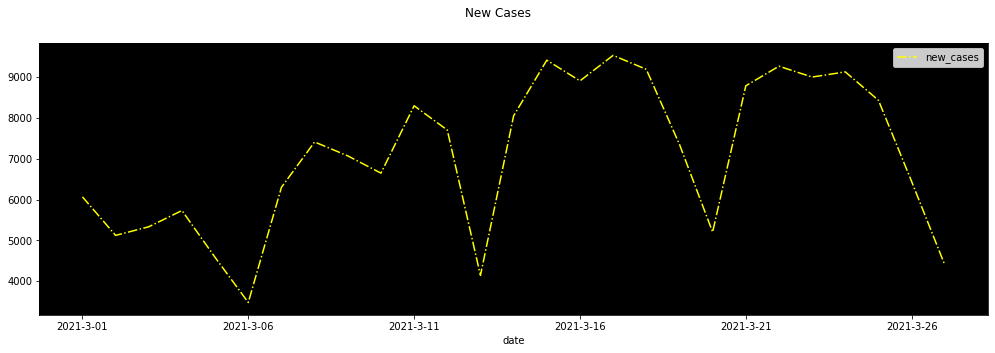

In [30]:
graphData = graphD.loc['2021-3-01' :'2021-3-27'][['new_cases']].plot(color=['yellow'],kind='line',figsize=(17,5), linestyle='-.')
graphData.set_facecolor('black')
plt.suptitle('New Cases')
plt.show()

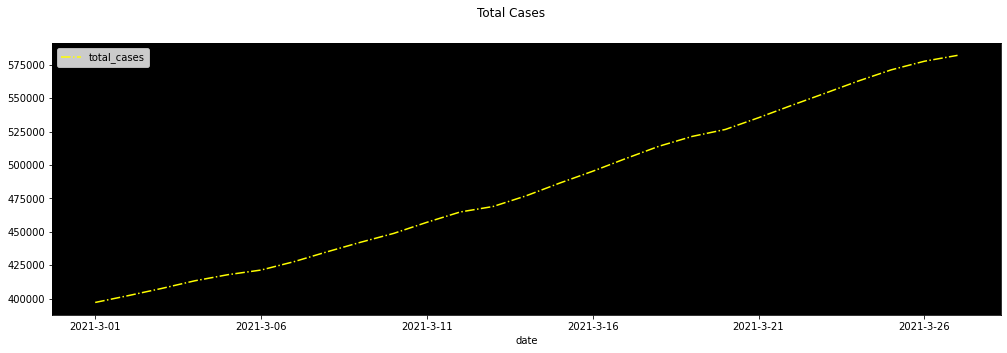

In [29]:
graphData = graphD.loc['2021-3-01' :'2021-3-27'][['total_cases']].plot(color=['yellow'],kind='line',figsize=(17,5), linestyle='-.')
graphData.set_facecolor('black')
plt.suptitle('Total Cases')
plt.show()

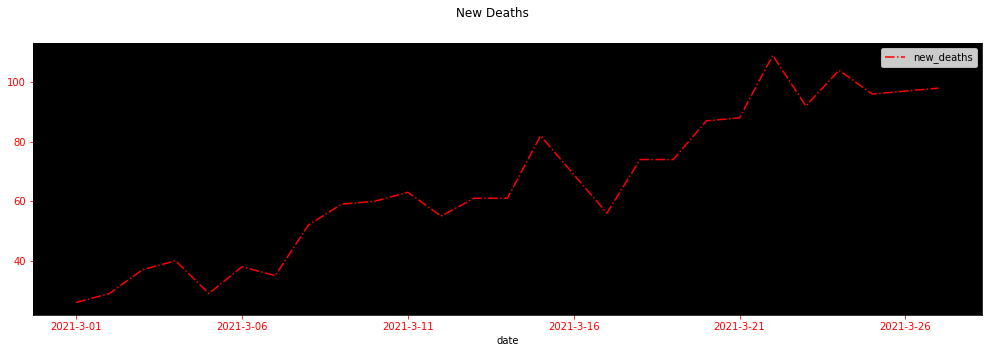

In [18]:
graphData = graphD.loc['2021-3-01' :'2021-3-27'][['new_deaths']].plot(color=['red'],kind='line',figsize=(17,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.suptitle('New Deaths')
plt.show()

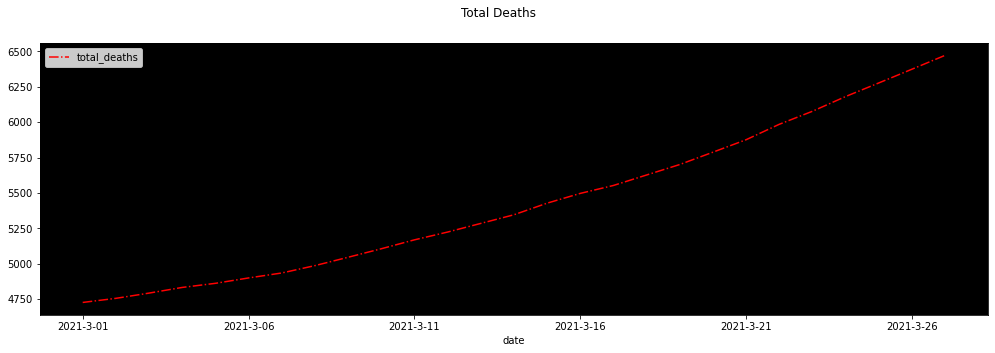

In [27]:
graphData = graphD.loc['2021-3-01' :'2021-3-27'][['total_deaths']].plot(color=['red'],kind='line',figsize=(17,5), linestyle='-.')
graphData.set_facecolor('black')
plt.suptitle('Total Deaths')
plt.show()

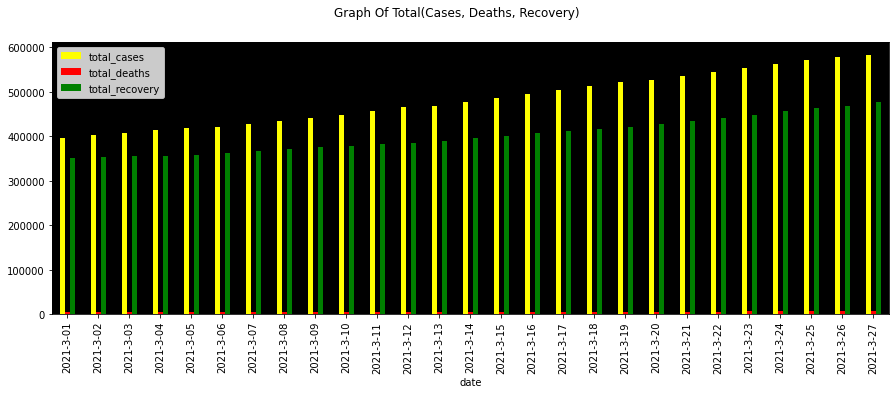

In [38]:
graphData = graphD.loc['2021-3-01' :'2021-3-27'][['total_cases','total_deaths','total_recovery']].plot(color=['yellow','red','green'],kind='bar',figsize=(15,5), linestyle='-.')
graphData.set_facecolor('black')
plt.suptitle('Graph Of Total(Cases, Deaths, Recovery)')
plt.show()